In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
df.Gender = pd.get_dummies(df.Gender, drop_first=True)
X = df.to_numpy()

np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

y = X[:, -1]
X = X[:, :-1]

In [4]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

print('max depth : ', clf.tree_.max_depth)
print('train accuracy : ', clf.score(X_train, y_train))
print('test accuracy : ', clf.score(X_test, y_test))

max depth :  2
train accuracy :  0.915625
test accuracy :  0.9125


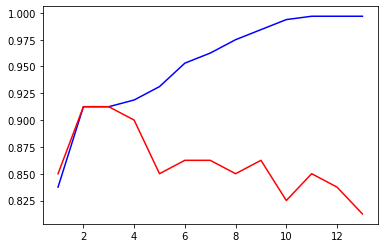

In [20]:
train_scores = []
test_scores = []
for d in range(1, 14):
    clf = DecisionTreeClassifier(max_depth=d, criterion='entropy')
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(np.arange(1, 14, 1), np.array(train_scores), 'b-')
plt.plot(np.arange(1, 14, 1), np.array(test_scores), 'r-')

In [15]:
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(X_train, y_train)
print('max depth : ', clf.tree_.max_depth)
print('train accuracy : ', clf.score(X_train, y_train))
print('test accuracy : ', clf.score(X_test, y_test))

max depth :  2
train accuracy :  0.9125
test accuracy :  0.9125


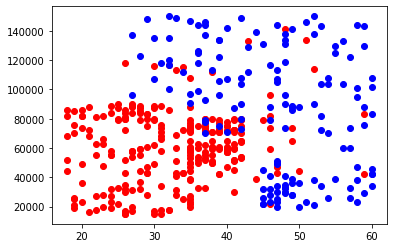

In [21]:
plt.plot(X[y == 0, 1], X[y == 0, 2], 'ro')
plt.plot(X[y == 1, 1], X[y == 1, 2], 'bo')

# Visualization

In [22]:
from sklearn.tree import export_text

In [39]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

print('max depth : ', clf.tree_.max_depth)
print('train accuracy : ', clf.score(X_train, y_train))
print('test accuracy : ', clf.score(X_test, y_test))

max depth :  2
train accuracy :  0.915625
test accuracy :  0.9125


In [40]:
print(export_text(clf, feature_names=['Gender', 'Age', 'EstimatedSalary']))

|--- Age <= 42.50
|   |--- EstimatedSalary <= 90500.00
|   |   |--- class: 0
|   |--- EstimatedSalary >  90500.00
|   |   |--- class: 1
|--- Age >  42.50
|   |--- Age <= 46.50
|   |   |--- class: 1
|   |--- Age >  46.50
|   |   |--- class: 1



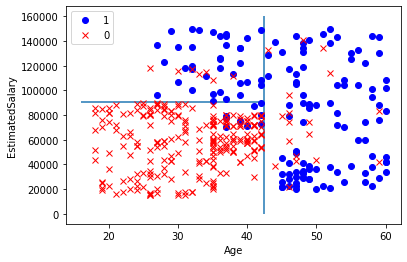

In [32]:
plt.plot(df[df['Purchased'] == 1]['Age'],
         df[df['Purchased'] == 1]['EstimatedSalary'], 'bo', label='1')

plt.plot(df[df['Purchased'] == 0]['Age'],
         df[df['Purchased'] == 0]['EstimatedSalary'], 'rx', label='0')

plt.vlines(42.5, 0, 160000)
plt.hlines(90500, 16, 42.5)

plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()

In [41]:
from sklearn.tree import export_graphviz

In [48]:
export_graphviz(clf,
                out_file='DT.dot',
                feature_names=['Gender', 'Age', 'EstimatedSalary'],
                filled=True, class_names=['P', 'nP'])

In [49]:
!dot -Tpng DT.dot -o DT.png